In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [21]:
np.random.seed(111)

In [25]:
def CreateDataSet(Number=1):
    Output = []
    for i in range(Number):
        rng = pd.date_range(start='1/1/2009',end='12/31/2012',freq='W-MON')
        data = np.random.randint(low=25,high=1000,size=len(rng))
        status = [1,2,3]
        random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        states = ['GA','FL','fl','NY','NJ','TX']
        random_states = [states[np.random.randint(low=0,high=len(states))] for i in range(len(rng))]
        
        Output.extend(zip(random_states,random_status,data,rng))
        
    return Output

In [26]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836 entries, 0 to 835
Data columns (total 4 columns):
State            836 non-null object
Status           836 non-null int64
CustomerCount    836 non-null int64
StatusDate       836 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 32.7+ KB


In [27]:
df.head()

,State,Status,CustomerCount,StatusDate
0,TX,3,930,2009-01-05
1,TX,2,954,2009-01-12
2,GA,1,895,2009-01-19
3,fl,1,527,2009-01-26
4,NY,1,820,2009-02-02


In [28]:
df.to_excel('Lesson3.xlsx',index=False)
print 'Done'

Done


In [29]:
Location = 'Lesson3.xlsx'

df= pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

State            object
Status            int64
CustomerCount     int64
dtype: object

In [30]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09', 
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=836, freq=None, tz=None)

In [31]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,TX,3,930
2009-01-12,TX,2,954
2009-01-19,GA,1,895
2009-01-26,fl,1,527
2009-02-02,NY,1,820


In [32]:
df['State'].unique()

array([u'TX', u'GA', u'fl', u'NY', u'FL', u'NJ'], dtype=object)

In [33]:
df['State'] = df['State'].apply(lambda x: x.upper())

In [34]:
df.State.unique()

array([u'TX', u'GA', u'FL', u'NY', u'NJ'], dtype=object)

In [35]:
mask = df['Status'] == 1
df = df[mask]

In [36]:
mask = df.State == 'NJ'
df['State'][mask] = 'NY'

In [37]:
df.State.unique()

array([u'GA', u'FL', u'NY', u'TX'], dtype=object)

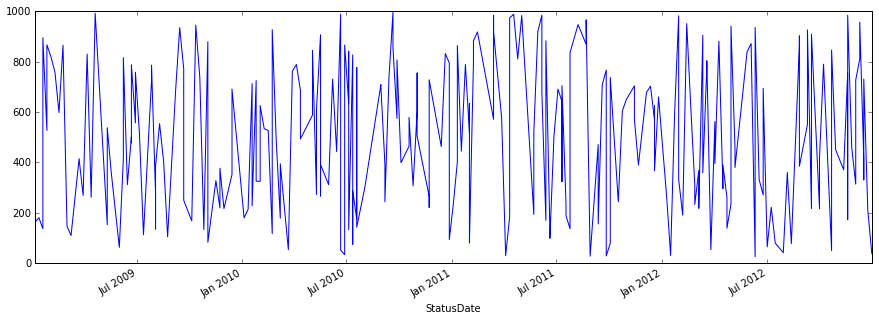

In [38]:
df.CustomerCount.plot(figsize=(15,5));

In [40]:
sortdf = df[df['State']=='NY'].sort(axis=0)
sortdf.head(10)

,State,Status,CustomerCount
StatusDate,,,
2009-02-02,NY,1,820
2009-03-02,NY,1,147
2009-03-30,NY,1,269
2009-04-06,NY,1,830
2009-04-20,NY,1,992
2009-05-18,NY,1,359
2009-06-08,NY,1,415
2009-06-22,NY,1,502
2009-06-22,NY,1,788


In [41]:
Daily = df.reset_index().groupby(['State','StatusDate']).sum()
Daily.head()

Status  CustomerCount
State StatusDate                       
FL    2009-01-19       1            372
      2009-01-26       1            527
      2009-02-09       1            759
      2009-02-16       1            598
      2009-02-23       1            865

In [42]:
del Daily['Status']
Daily.head()

CustomerCount
State StatusDate               
FL    2009-01-19            372
      2009-01-26            527
      2009-02-09            759
      2009-02-16            598
      2009-02-23            865

In [43]:
Daily.index

MultiIndex(levels=[[u'FL', u'GA', u'NY', u'TX'], [2009-01-05 00:00:00, 2009-01-12 00:00:00, 2009-01-19 00:00:00, 2009-01-26 00:00:00, 2009-02-02 00:00:00, 2009-02-09 00:00:00, 2009-02-16 00:00:00, 2009-02-23 00:00:00, 2009-03-02 00:00:00, 2009-03-09 00:00:00, 2009-03-23 00:00:00, 2009-03-30 00:00:00, 2009-04-06 00:00:00, 2009-04-13 00:00:00, 2009-04-20 00:00:00, 2009-05-11 00:00:00, 2009-05-18 00:00:00, 2009-06-01 00:00:00, 2009-06-08 00:00:00, 2009-06-15 00:00:00, 2009-06-22 00:00:00, 2009-06-29 00:00:00, 2009-07-06 00:00:00, 2009-07-13 00:00:00, 2009-07-27 00:00:00, 2009-08-03 00:00:00, 2009-08-10 00:00:00, 2009-08-17 00:00:00, 2009-08-24 00:00:00, 2009-09-07 00:00:00, 2009-09-14 00:00:00, 2009-09-21 00:00:00, 2009-10-05 00:00:00, 2009-10-12 00:00:00, 2009-10-19 00:00:00, 2009-10-26 00:00:00, 2009-11-02 00:00:00, 2009-11-16 00:00:00, 2009-11-23 00:00:00, 2009-11-30 00:00:00, 2009-12-14 00:00:00, 2010-01-04 00:00:00, 2010-01-11 00:00:00, 2010-01-18 00:00:00, 2010-01-25 00:00:00, 2010-

In [44]:
Daily.index.levels[0]

Index([u'FL', u'GA', u'NY', u'TX'], dtype='object', name=u'State')

In [45]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09', 
               ...
               '2012-10-22', '2012-10-29', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name=u'StatusDate', length=164, freq=None, tz=None)

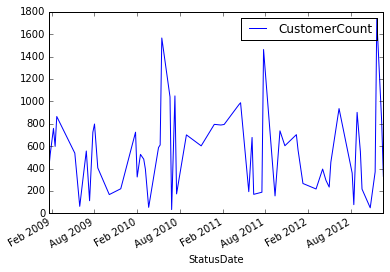

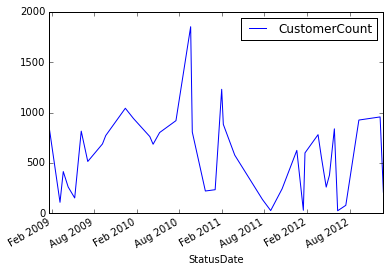

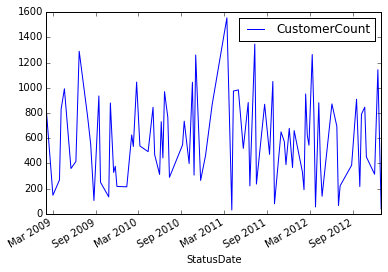

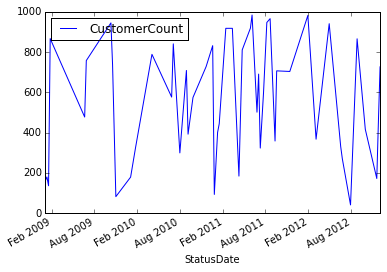

In [47]:
Daily.loc['FL'].plot()
Daily.loc['GA'].plot()
Daily.loc['NY'].plot()
Daily.loc['TX'].plot()

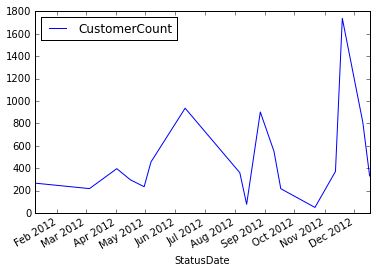

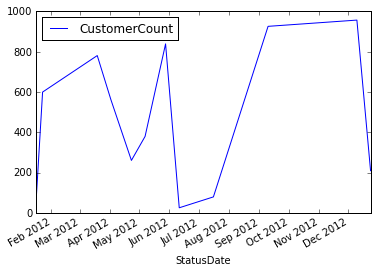

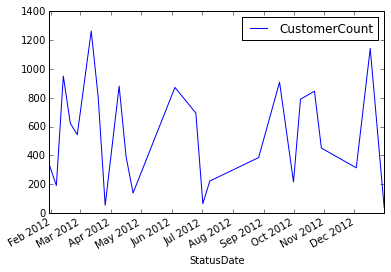

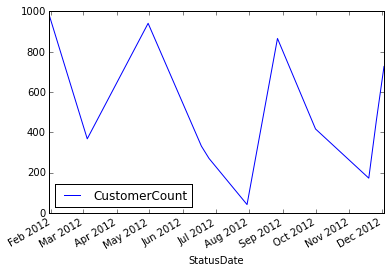

In [48]:
Daily.loc['FL']['2012':].plot()
Daily.loc['GA']['2012':].plot()
Daily.loc['NY']['2012':].plot()
Daily.loc['TX']['2012':].plot()